### Developing "Momentum" Trading Strategy 

In this project, I will use Momentum Strategy (which is also known as "trend following strategy")

In [69]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

Now, after I have imported the libraries, I will use the Yahoo finance API to get the stock data. Particularly, we will look at GLD (the Gold ETF)

In [70]:
gld = yf.download('GLD')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace=True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

[*********************100%%**********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2004-11-18,1,44.430000,44.490002,44.070000,44.380001
2004-11-19,2,44.490002,44.919998,44.470001,44.779999
2004-11-22,3,44.750000,44.970001,44.740002,44.950001
2004-11-23,4,44.880001,44.919998,44.720001,44.750000
2004-11-24,5,44.930000,45.049999,44.790001,45.049999


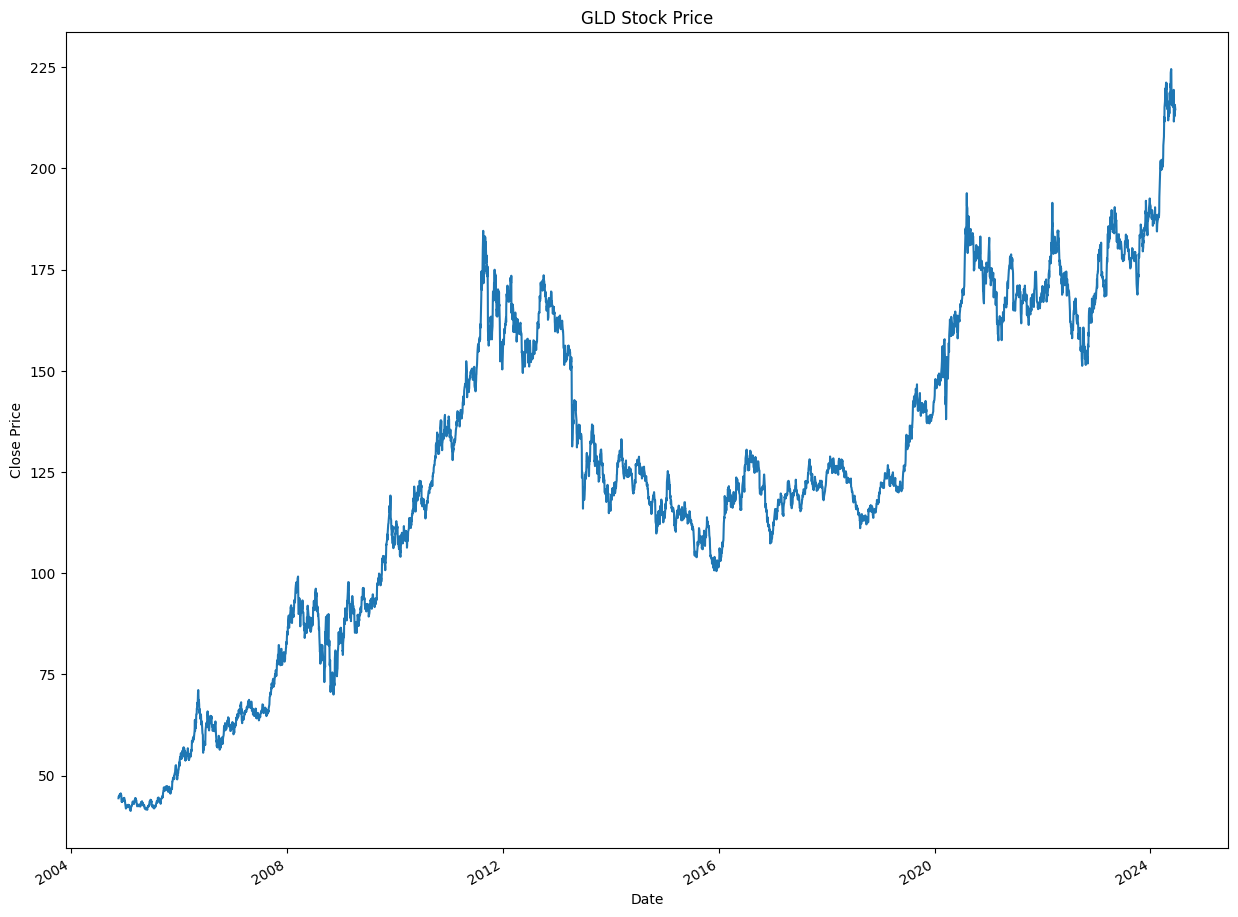

In [71]:
gld['Close'].plot(title='GLD Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [72]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4927 entries, 2004-11-18 to 2024-06-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     4927 non-null   int32  
 1   Open    4927 non-null   float64
 2   High    4927 non-null   float64
 3   Low     4927 non-null   float64
 4   Close   4927 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 211.7 KB


For the next step, we will:
* Calculate the signal based on price and statistical action
* Try moving average crossover to generate signals
* There might be some real life variation

#### First we will add moving averages to our data frame

In [73]:
gld['9-day-average'] = gld['Close'].rolling(9).mean()
gld['21-day-average'] = gld['Close'].rolling(21).mean()
gld[19:25]

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\888804571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['9-day-average'] = gld['Close'].rolling(9).mean()
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\888804571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['21-day-average'] = gld['Close'].rolling(21).mean()


,day,Open,High,Low,Close,9-day-average,21-day-average
Date,,,,,,,
2004-12-16,20,43.990002,44.049999,43.580002,43.680000,44.071111,NaN
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,43.962222,44.594286
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.876666,44.592381
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.900000,44.565714
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.926667,44.521428
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,44.018889,44.498571


#### Now, before we add the signal column, we will add RSI for signal confirmation, in order to improve signal calculation

In [74]:
def compute_RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

gld['RSI'] = compute_RSI(gld['Close'])

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\1899472598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['RSI'] = compute_RSI(gld['Close'])


#### Next, we will add the "signal" column

In [75]:
gld['signal'] = np.where((gld['9-day-average'] > gld['21-day-average']) & (gld['RSI'] < 70), 1, 0)
gld['signal'] = np.where((gld['9-day-average'] < gld['21-day-average']) & (gld['RSI'] > 30), -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\3642105337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where((gld['9-day-average'] > gld['21-day-average']) & (gld['RSI'] < 70), 1, 0)
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\3642105337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where((gld['9-day-average'] < gld['21-day-average']) & (gld['RSI'] > 30), -1, gld['signal'])
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\3642105337

,day,Open,High,Low,Close,9-day-average,21-day-average,RSI,signal
Date,,,,,,,,,
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,43.962222,44.594286,39.693343,-1
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.876666,44.592381,43.205592,-1
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.900000,44.565714,39.642863,-1
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.926667,44.521428,41.340784,-1
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,44.018889,44.498571,36.619752,-1


Generates trading signals based on the moving averages:
* 1 (buy signal) if the 9-day average is greater than the 21-day average.
* -1 (sell signal) if the 9-day average is less than the 21-day average.

#### Implementing Risk Management
Here, I will incorporate a stop-loss mechanism to manage risk

In [76]:
stop_loss_pct = 0.02

def apply_stop_loss(data, stop_loss_pct):
    stop_loss = np.zeros(data.shape[0])
    max_price = data['Close'][0]
    for i in range(1, len(data)):
        if data['signal'][i-1] == 1:
            max_price = max(max_price, data['Close'][i])
            stop_loss[i] = -1 if data['Close'][i] < max_price * (1 - stop_loss_pct) else data['signal'][i]
        else:
            stop_loss[i] = data['signal'][i]
    return stop_loss

gld['signal'] = apply_stop_loss(gld, stop_loss_pct)
gld.head()

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\397606340.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_price = data['Close'][0]
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\397606340.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['signal'][i-1] == 1:
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\397606340.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stop_loss[i] = data['signa

,day,Open,High,Low,Close,9-day-average,21-day-average,RSI,signal
Date,,,,,,,,,
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,43.962222,44.594286,39.693343,0.0
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.876666,44.592381,43.205592,-1.0
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.900000,44.565714,39.642863,-1.0
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.926667,44.521428,41.340784,-1.0
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,44.018889,44.498571,36.619752,-1.0


#### Calculate Instantaneous returns/system returns

We will need to incorporate transaction costs to simulate real trading conditions.

In [77]:
transaction_cost = 0.001  # 0.1% per transaction

gld['return'] = np.log(gld['Close']).diff()
gld['entry'] = gld['signal'].diff()
gld['system_return'] = gld['signal'].shift(1) * gld['return'] - transaction_cost * gld['entry'].abs()
gld.head()

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\3462552452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['return'] = np.log(gld['Close']).diff()
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\3462552452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['entry'] = gld['signal'].diff()
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\3462552452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,day,Open,High,Low,Close,9-day-average,21-day-average,RSI,signal,return,entry,system_return
Date,,,,,,,,,,,,
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,43.962222,44.594286,39.693343,0.0,NaN,NaN,NaN
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.876666,44.592381,43.205592,-1.0,0.003389,-1.0,-0.001000
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.900000,44.565714,39.642863,-1.0,-0.002710,0.0,0.002710
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.926667,44.521428,41.340784,-1.0,-0.004533,0.0,0.004533
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,44.018889,44.498571,36.619752,-1.0,0.005663,0.0,-0.005663


Identifies entry points where the signal changes:
* 2 for short to long.
* -2 for long to short.

Now, we will plot our trade to the time series

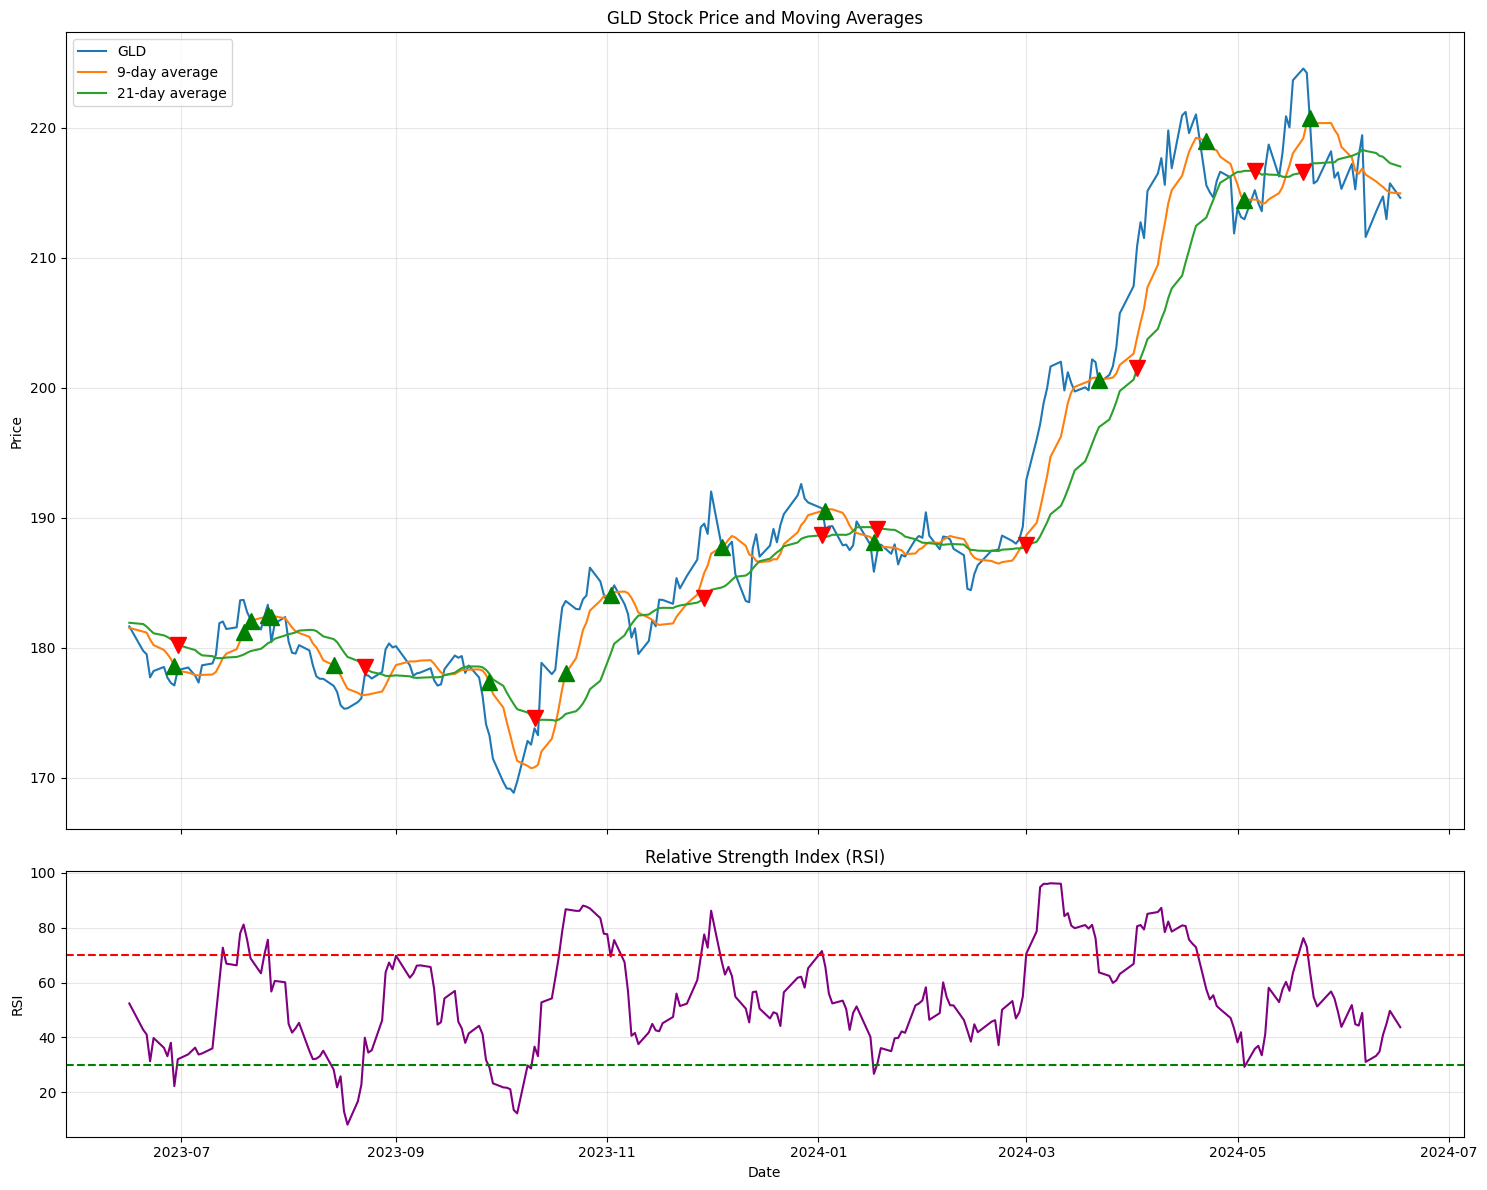

In [78]:
plt.rcParams['figure.figsize'] = 15, 12 
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
# Plotting the GLD stock price and moving averages
ax1.grid(True, alpha=0.3)
ax1.plot(gld.iloc[-252:]['Close'], label='GLD')
ax1.plot(gld.iloc[-252:]['9-day-average'], label='9-day average')
ax1.plot(gld.iloc[-252:]['21-day-average'], label='21-day average')
ax1.plot(gld[-252:].loc[gld.entry == 1].index, gld[-252:]['9-day-average'][gld.entry == 1], '^', color='g', markersize=12)
ax1.plot(gld[-252:].loc[gld.entry == -1].index, gld[-252:]['21-day-average'][gld.entry == -1], 'v', color='r', markersize=12)
ax1.legend(loc=2)
ax1.set_ylabel('Price')
ax1.set_title('GLD Stock Price and Moving Averages')

# Plotting the RSI
ax2.grid(True, alpha=0.3)
ax2.plot(gld.iloc[-252:]['RSI'], label='RSI', color='purple')
ax2.axhline(70, color='r', linestyle='--')
ax2.axhline(30, color='g', linestyle='--')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.set_title('Relative Strength Index (RSI)')

plt.tight_layout()
plt.show()


#### Here, we do the following steps:
* Sets the figure size for the plot.
* Adds grid lines with transparency.
* Plots the 'Close' price, 9-day average, and 21-day average for the last 252 days.
* Marks the entry points with green upward triangles for buy signals and red downward triangles for sell signals.
* Adds a legend to the plot.

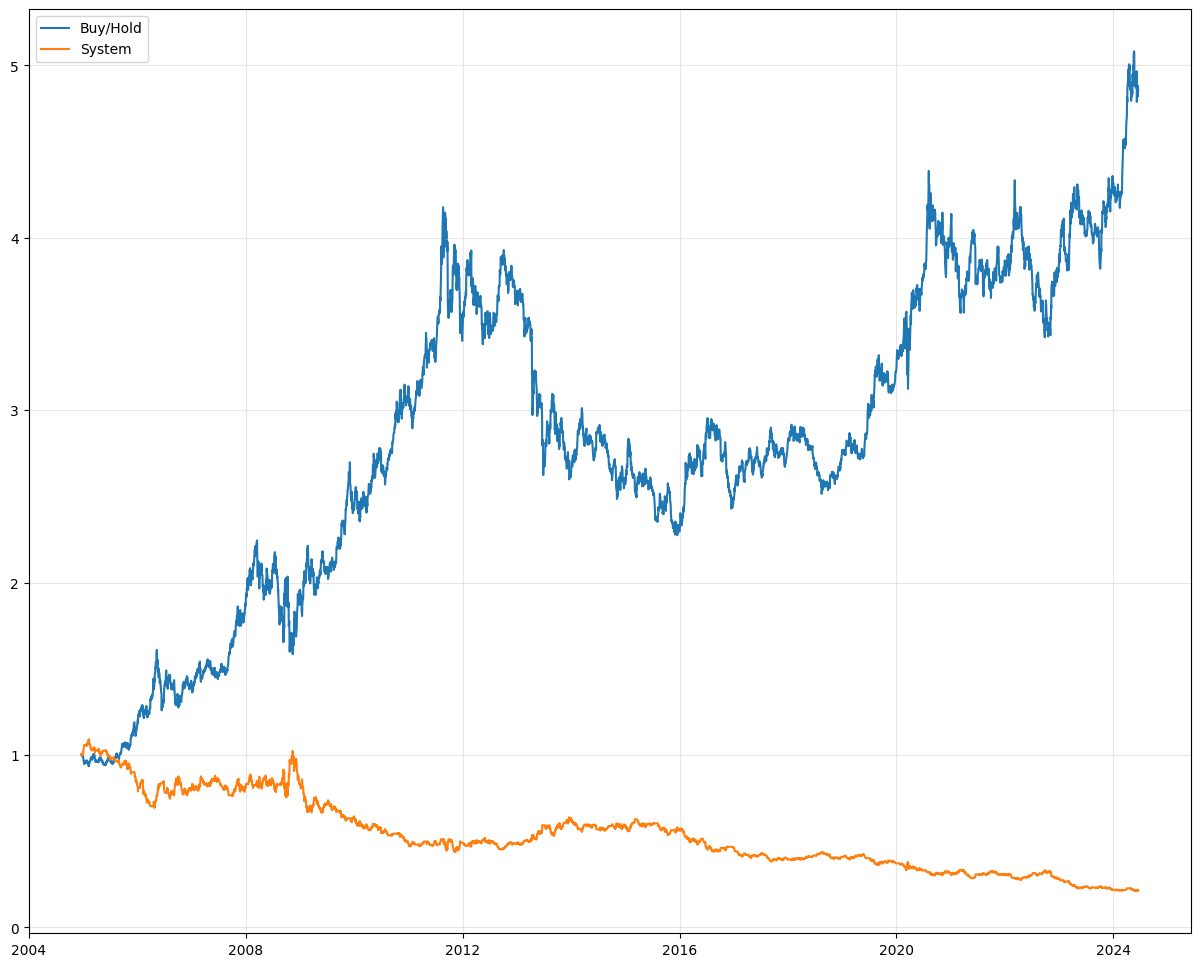

In [79]:
plt.plot(np.exp(gld['return']).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label = 'System')
plt.legend(loc = 2)

plt.grid(True, alpha = .3)

In [80]:
np.exp(gld['return']).cumprod()[-1] - 1


C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\3599775102.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(gld['return']).cumprod()[-1] - 1


3.8565287911242683

In [81]:
np.exp(gld['system_return']).cumprod()[-1] - 1

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_16940\1497219921.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(gld['system_return']).cumprod()[-1] - 1


-0.7862241883166039

#### Adding Performance Metrics
I will include additional performance metrics such as Sharpe ratio and maximum drawdown.

In [82]:
def calculate_sharpe_ratio(data, risk_free_rate=0.01):
    excess_return = data['system_return'] - risk_free_rate / 252
    return excess_return.mean() / excess_return.std() * np.sqrt(252)

def calculate_max_drawdown(data):
    cum_returns = np.exp(data['system_return'].cumsum())
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

sharpe_ratio = calculate_sharpe_ratio(gld)
max_drawdown = calculate_max_drawdown(gld)

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown}")

Sharpe Ratio: -0.5874780033883628
Max Drawdown: -0.8083650142394405
